###  Project
                          
#    Abalone Case Study
                            
##   Linear Regression             


In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")


In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Observation:-
          
               We can see here little information of data thats shows 5 rows and all present columns in. 

In [4]:
df.shape

(4177, 9)

Observation:-
              
              We can check data having 4177 no. of rows and 9 no of columns.

In [5]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

Observation:-
              
              We can check all columns present in data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Observation:-
    
            Here we can se information of data according to this data having float64(7), int64(1), object(1) no of columns.

In [7]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Observation:- 
             
          There is no null values present in data.

In [8]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Observation:-
              
        - No missing values in the dataset
        - All numerical features but 'sex'
        - Though features are not normaly distributed, are close to normality
        - None of the features have minimum = 0 except Height (requires re-check)
        - Each feature has difference scale range

#### Checking 0 values in Height column

In [9]:
#cheking 0 Values in Height column
df.loc[df['Height']==0.0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


-only no of 2 rows having 0 value in Height, can drop these 2 rows won't affect on data loss that much

In [10]:
#dropping 2 rows which is 0 value in Height
df = df.loc[df["Height"] != 0.0]


In [11]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [12]:
df['Sex'].value_counts()

M    1528
I    1340
F    1307
Name: Sex, dtype: int64

# EXPLORATORY DATA ANALYSIS

In [13]:
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [14]:
Numerical_features=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']

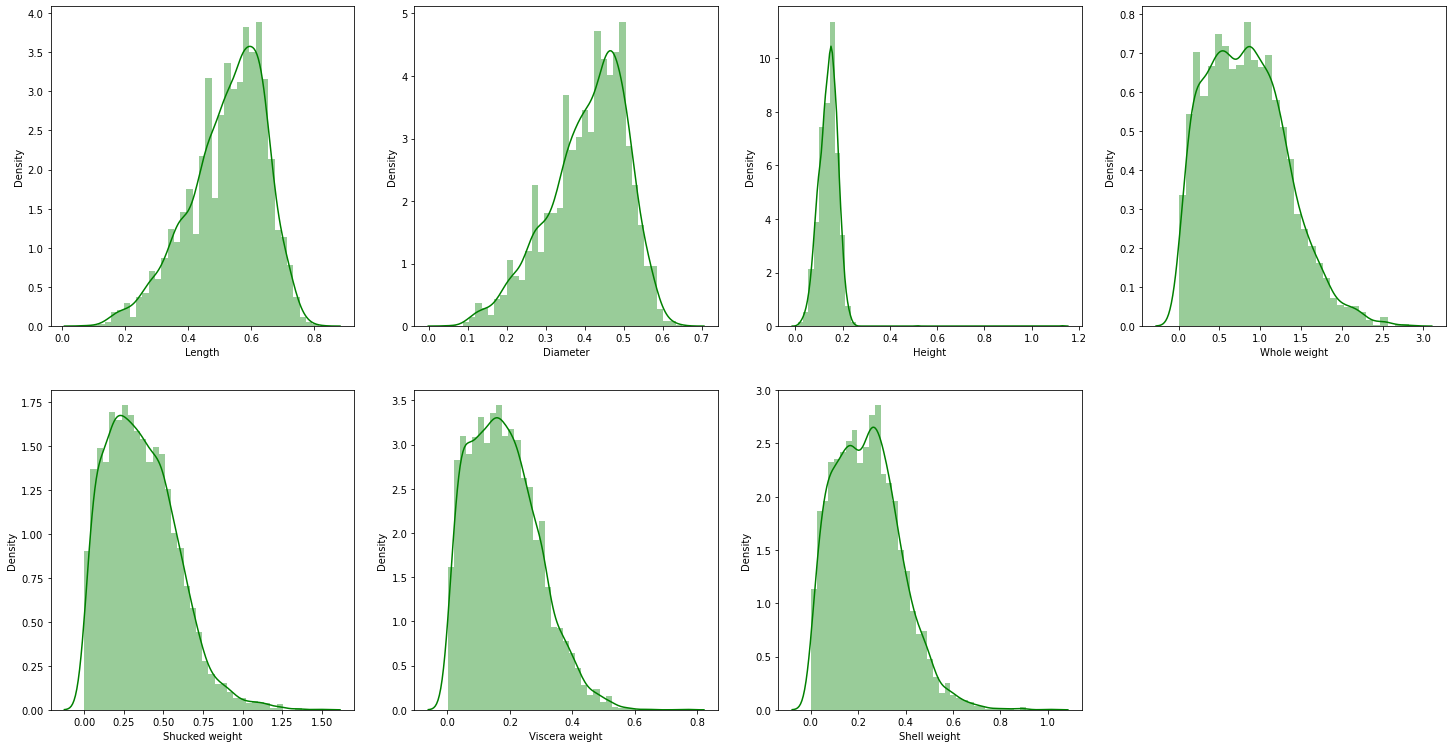

In [15]:
plt.figure(figsize=(25,20))
for i in enumerate(Numerical_features):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [16]:
df.skew()

Length           -0.640993
Diameter         -0.610182
Height            3.166364
Whole weight      0.530549
Shucked weight    0.718735
Viscera weight    0.591455
Shell weight      0.621081
Rings             1.113754
dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Density'>

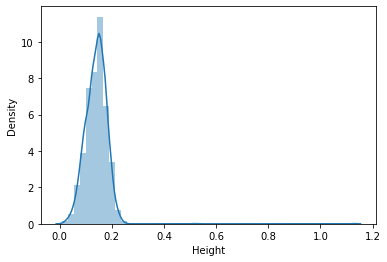

In [17]:
sns.distplot(df['Height'])

Observation:-

       For normally distributed data, the skewness should be about 0. For unimodal continuous distributions,                           
       a skewness value > 0 means that there is more weight in the right tail of the distribution.                                    
       The function skewtest can be used to determine if the skewness value is close enough to 0, statistically speaking.

    - Height has highest skewedness followed by age, Shucked weight (can be cross verified through histogram plot)


## Bivariate Analysis
Bivariate analysis is vital part of data analysis process for, it gives clear picture on how each features are affected in presence of other features.

It also helps us understand and identify significance features, overcome multi-collinearity effect, inter-dependency and thus, provides insights on hidden data noise pattern.

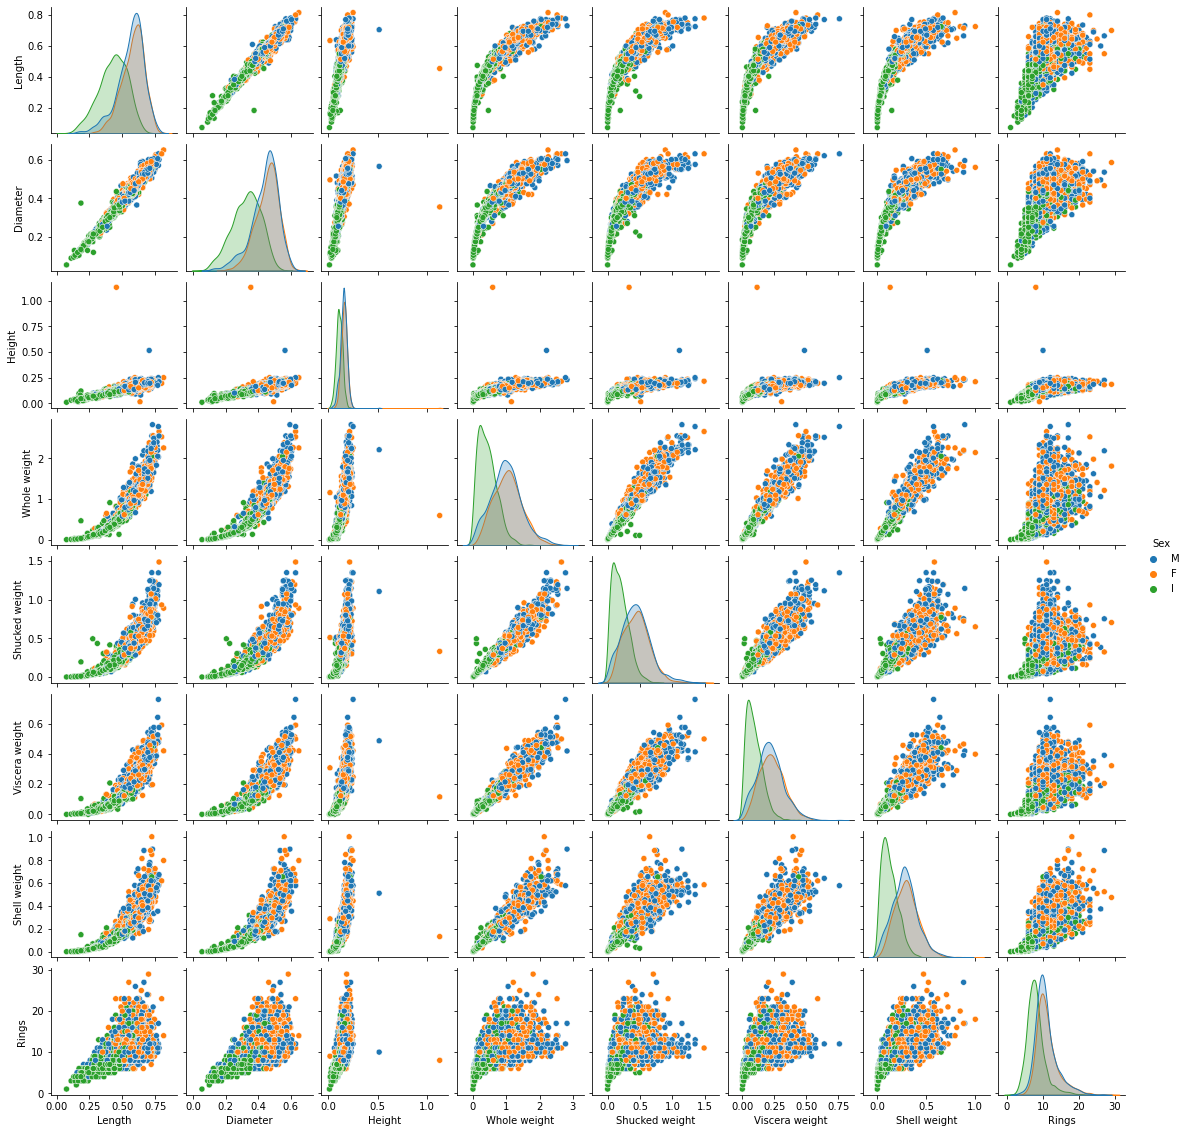

In [18]:
sns.pairplot(df,size=2,hue='Sex')

key insights length is linearly correlated with diameter while, non-linear relation with height, whole weight, shucked weight, viscera weight and shell weight



<AxesSubplot:xlabel='Sex', ylabel='count'>

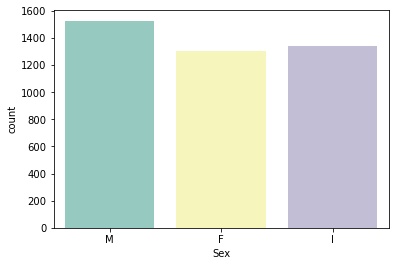

In [19]:
sns.countplot(x = 'Sex', data = df, palette="Set3")


In [20]:
df['Sex'].value_counts()

M    1528
I    1340
F    1307
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

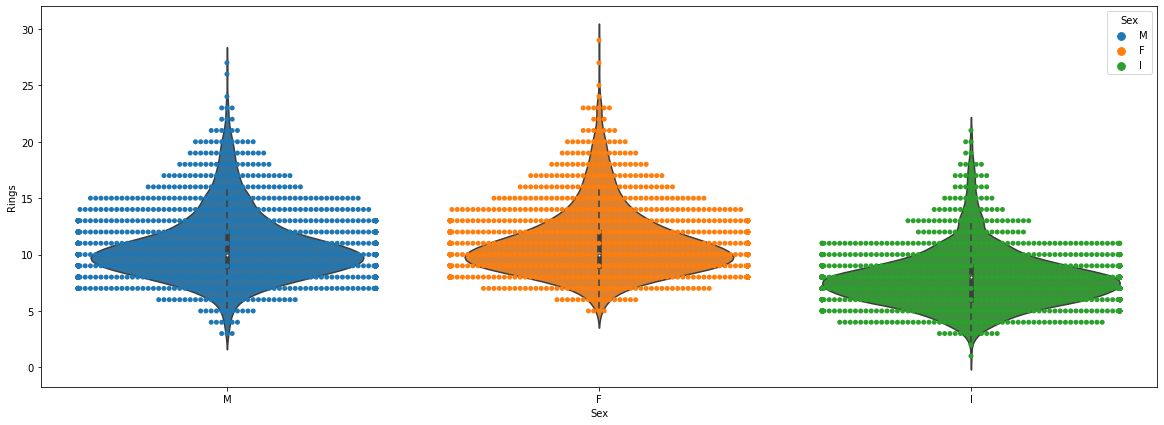

In [21]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Rings', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Rings', data = df)

    Male : age majority lies in between 5 Rings to 16 Rings
    Female: age majority lies in between 5 Rings to 16 Rings
    Infant: age majority lies in between 3 Rings to < 15 Rings

In [22]:
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']].mean().sort_values('Rings')


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,,,,,,,,
I,0.427828,0.326556,0.108157,0.431587,0.191123,0.092062,0.128026,7.891791
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304


<AxesSubplot:>

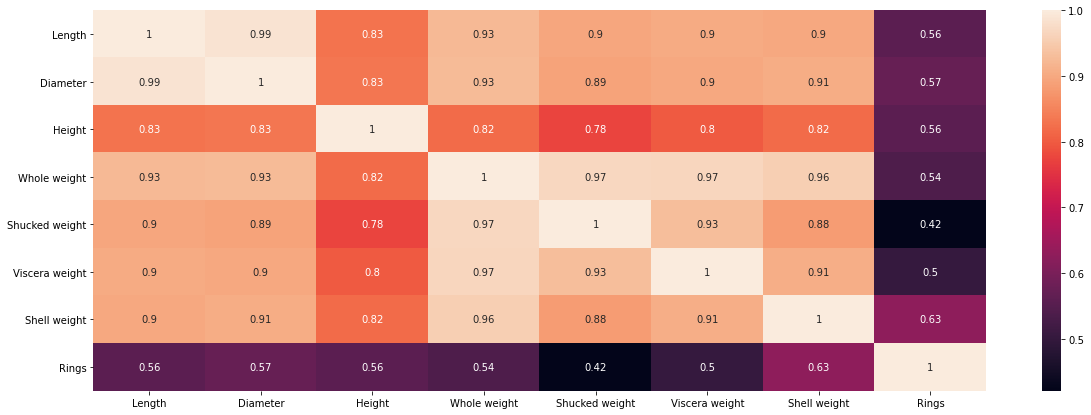

In [23]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True)

   1.Whole Weight is almost linearly varying with all other features except Rings
   
   2.Heigh has least linearity with remaining features
   
   3.Rings is most linearly propotional with Shell Weight followed by Diameter and length
   
   4.Rings is least correlated with Shucked Weight
   
   5.Diameter is highly correlated with Lenght(will only keep one them)

In [24]:
dfcorr=df.corr()

dfcorr['Rings']

Length            0.556464
Diameter          0.574418
Height            0.557625
Whole weight      0.540151
Shucked weight    0.420597
Viscera weight    0.503562
Shell weight      0.627928
Rings             1.000000
Name: Rings, dtype: float64

In [25]:

dfcorr['Whole weight']

Length            0.925217
Diameter          0.925414
Height            0.819886
Whole weight      1.000000
Shucked weight    0.969389
Viscera weight    0.966354
Shell weight      0.955924
Rings             0.540151
Name: Whole weight, dtype: float64

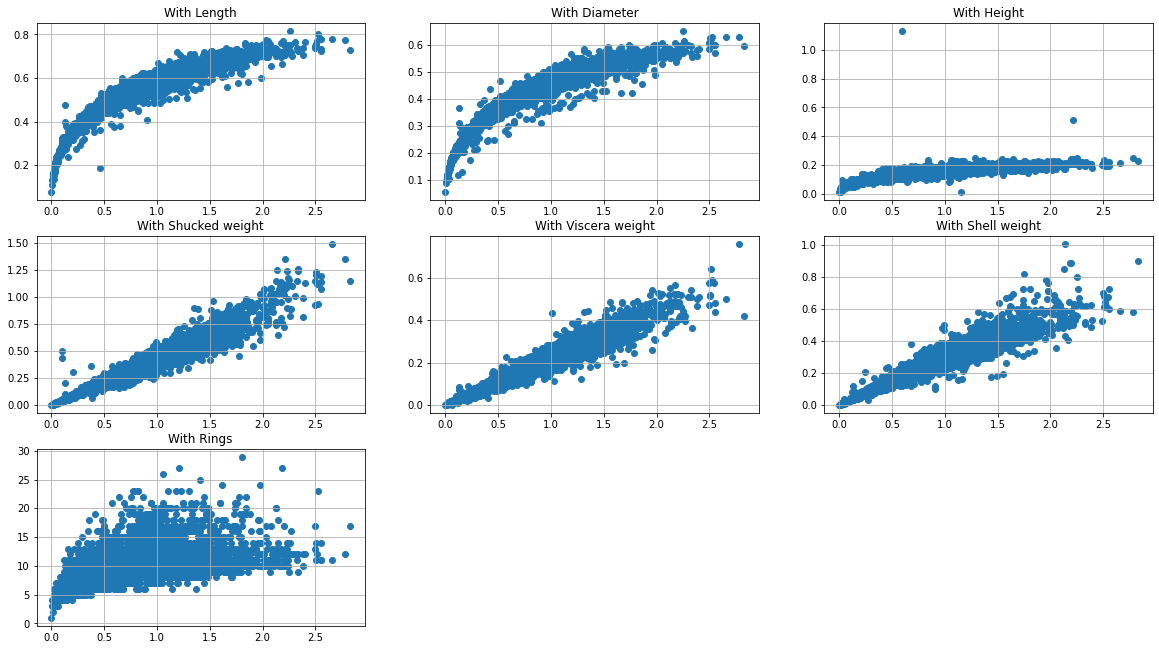

In [26]:
var = 'Whole weight'
plt.figure(figsize=(20,15))

plt.subplot(4,3,1)
plt.scatter(x = df[var], y = df['Length'],)
plt.title('With Length')
plt.grid(True)

plt.subplot(4,3,2)
plt.scatter(x = df[var], y = df['Diameter'],)
plt.title('With Diameter')
plt.grid(True)

plt.subplot(4,3,3)
plt.scatter(x = df[var], y = df['Height'],)
plt.title('With Height')
plt.grid(True)

plt.subplot(4,3,4)
plt.scatter(x = df[var], y = df['Shucked weight'],)
plt.title('With Shucked weight')
plt.grid(True)


plt.subplot(4,3,5)
plt.scatter(x = df[var], y = df['Viscera weight'],)
plt.title('With Viscera weight')
plt.grid(True)


plt.subplot(4,3,6)
plt.scatter(x = df[var], y = df['Shell weight'],)
plt.title('With Shell weight')
plt.grid(True)

plt.subplot(4,3,7)
plt.scatter(x = df[var], y = df['Rings'],)
plt.title('With Rings')
plt.grid(True)


## In above cell we can see Correlation of Whole Weight with other columns
Whole Weight is almost linearly varying with all other features except Rings


#### Whole Weight is almost linearly varying with all other features except Rings 
#### Already tried lot of Model Builing with includes Whole Weight columns not getting good result so dropping Whole Weight column    
#### because of multi-collinearity

In [27]:
# Dropping the Whole Weight column  
df.drop(['Whole weight'],axis=1,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4175 non-null   object 
 1   Length          4175 non-null   float64
 2   Diameter        4175 non-null   float64
 3   Height          4175 non-null   float64
 4   Shucked weight  4175 non-null   float64
 5   Viscera weight  4175 non-null   float64
 6   Shell weight    4175 non-null   float64
 7   Rings           4175 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 453.6+ KB


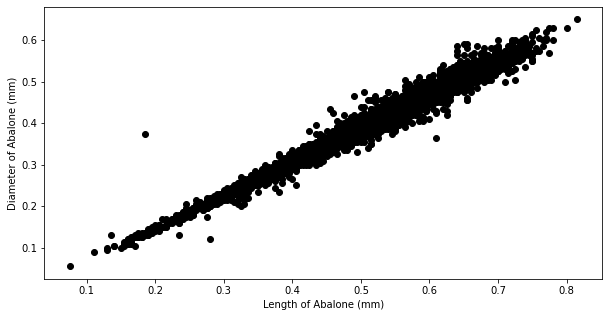

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(df['Length'],df['Diameter'],c='Black')
plt.xlabel('Length of Abalone (mm)')
plt.ylabel('Diameter of Abalone (mm)')
plt.show()

Length is linearly varying on Diameter

#### Already tried lot of Model Builing with including Length columns not getting good result so dropping Length column    
#### because of multi-collinearity

In [30]:
# Dropping the Length column  
df.drop(['Length'],axis=1,inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4175 non-null   object 
 1   Diameter        4175 non-null   float64
 2   Height          4175 non-null   float64
 3   Shucked weight  4175 non-null   float64
 4   Viscera weight  4175 non-null   float64
 5   Shell weight    4175 non-null   float64
 6   Rings           4175 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 420.9+ KB


In [32]:
df.shape

(4175, 7)

Text(0, 0.5, 'No. of Rings')

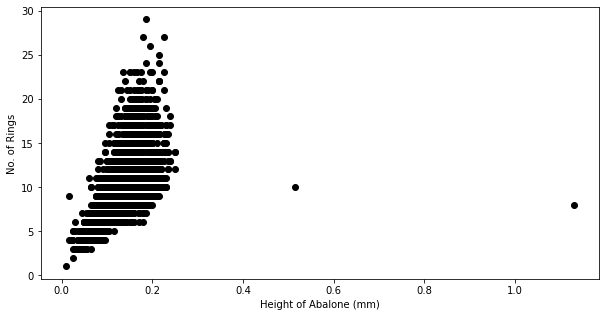

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(df['Height'],df['Rings'],c='Black')
plt.xlabel('Height of Abalone (mm)')
plt.ylabel('No. of Rings')

-Height does not have that much strong correlation with Rings, Height of most of the abalone 0.05 mm to 0.25mm.

Text(0, 0.5, 'No. of Rings')

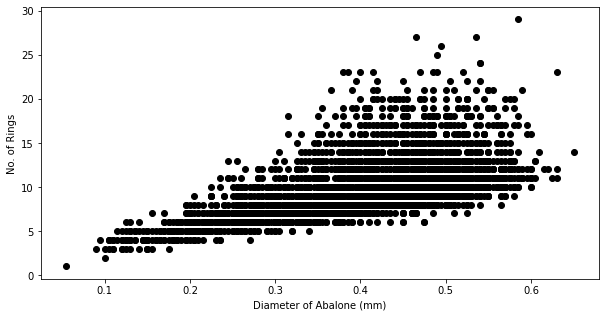

In [34]:
plt.figure(figsize=(10,5))
plt.scatter(df['Diameter'],df['Rings'],c='Black')
plt.xlabel('Diameter of Abalone (mm)')
plt.ylabel('No. of Rings')

Here we can notice Diameter increase the Rings of Abalone

Text(0, 0.5, 'No. of Rings')

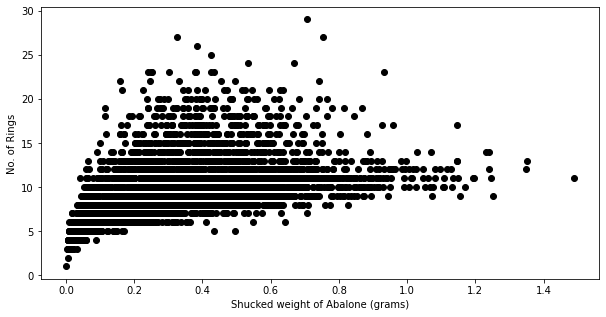

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(df['Shucked weight'],df['Rings'],c='Black')
plt.xlabel('Shucked weight of Abalone (grams)')
plt.ylabel('No. of Rings')

Here most of Rings of Abalone are between 0.2grams to 0.6grams Shucked weight 

Text(0, 0.5, 'No. of Rings')

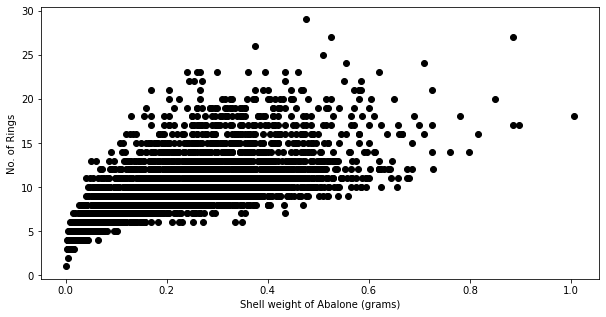

In [36]:
plt.figure(figsize=(10,5))
plt.scatter(df['Shell weight'],df['Rings'],c='Black')
plt.xlabel('Shell weight of Abalone (grams)')
plt.ylabel('No. of Rings')

When Shell weight is increasing that also increase Rings of Abalone

#### Encoding the Sex Columns

In [37]:
df=pd.get_dummies(df)

In [38]:
df.head()

,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.365,0.095,0.2245,0.1010,0.150,15,0,0,1
1,0.265,0.090,0.0995,0.0485,0.070,7,0,0,1
2,0.420,0.135,0.2565,0.1415,0.210,9,1,0,0
3,0.365,0.125,0.2155,0.1140,0.155,10,0,0,1
4,0.255,0.080,0.0895,0.0395,0.055,7,0,1,0


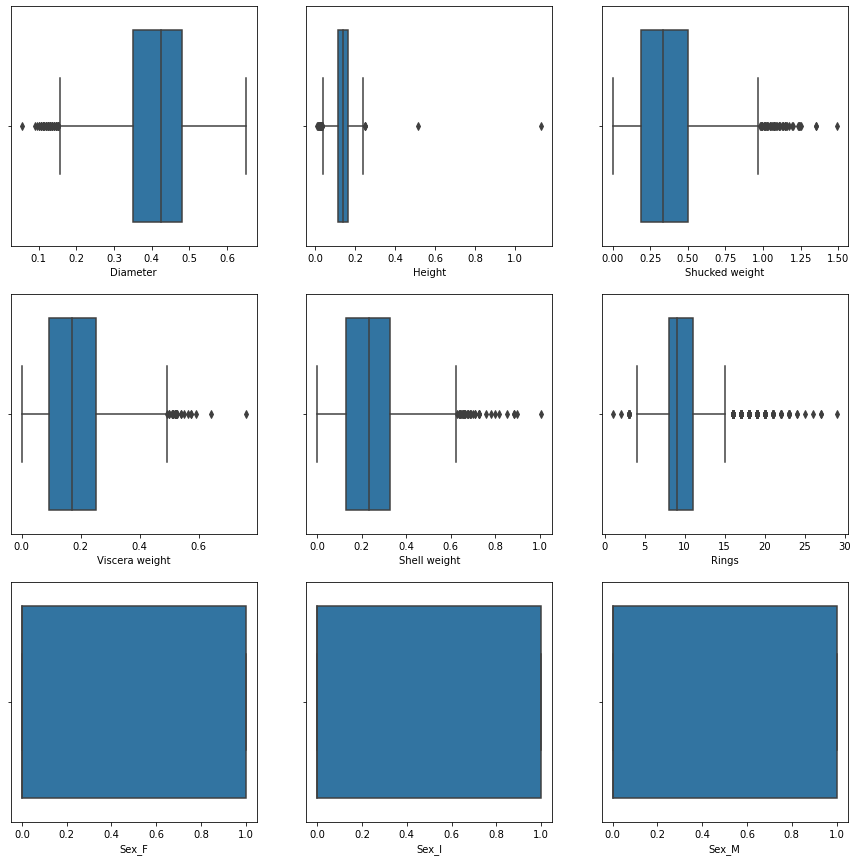

In [39]:
plt.figure(figsize=(15,15))
for o in enumerate(df):
    plt.subplot(3,3,o[0]+1)
    sns.boxplot(df[o[1]])

As we can notice almost every column having outliers

#### ZSCORE METHOD

In [40]:
from scipy import stats


In [41]:
#zscore

from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  166,  166,
        167,  168,  170,  181,  232,  236,  236,  237,  238,  270,  275,
        277,  278,  294,  310,  313,  314,  334,  351,  355,  358,  362,
        375,  416,  417,  428,  431,  433,  469,  478,  480,  501,  526,
        530,  572,  628,  673,  674,  675,  678,  694,  696,  719,  720,
        744,  754,  756,  811,  891,  891, 1048, 1051, 1193, 1197, 1199,
       1202, 1204, 1206, 1206, 1207, 1207, 1207, 1209, 1416, 1416, 1417,
       1421, 1425, 1426, 1426, 1427, 1428, 1527, 1753, 1755, 1756, 1758,
       1760, 1761, 1761, 1762, 1762, 1820, 1981, 1986, 2050, 2089, 2107,
       2107, 2113, 2156, 2160, 2175, 2179, 2198, 2200, 2207, 2208, 2273,
       2274, 2304, 2333, 2333, 2334, 2343, 2357, 2367, 2435, 2458, 2470,
       2543, 2623, 2623, 2624, 2708, 2709, 2709, 2809, 2809, 2810, 2810,
       2861, 2862, 2862, 3006, 3007, 3139, 3147, 3148, 3148, 3150, 3150,
       3187, 3192, 3279, 3358, 3426, 3426, 3598, 3

In [42]:
z[6][5]

3.12202420198091

In [43]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (4175, 9)
After removing outliers:: (4034, 9)


#### IQR METHOD

In [44]:
#IQR
from scipy import stats 
IQR = stats.iqr(df) 
IQR 

0.5015

In [45]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [46]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(2375, 9)


#### We can notice using IQR method for outliers removal there is huge data loss so considering ZSCORE 

In [47]:
df=df_1

In [48]:
df.shape

(4034, 9)

# Dividing data into X and Y

In [49]:
x=df.drop(['Rings'],axis=1)
y=df['Rings']


# Skewness handling

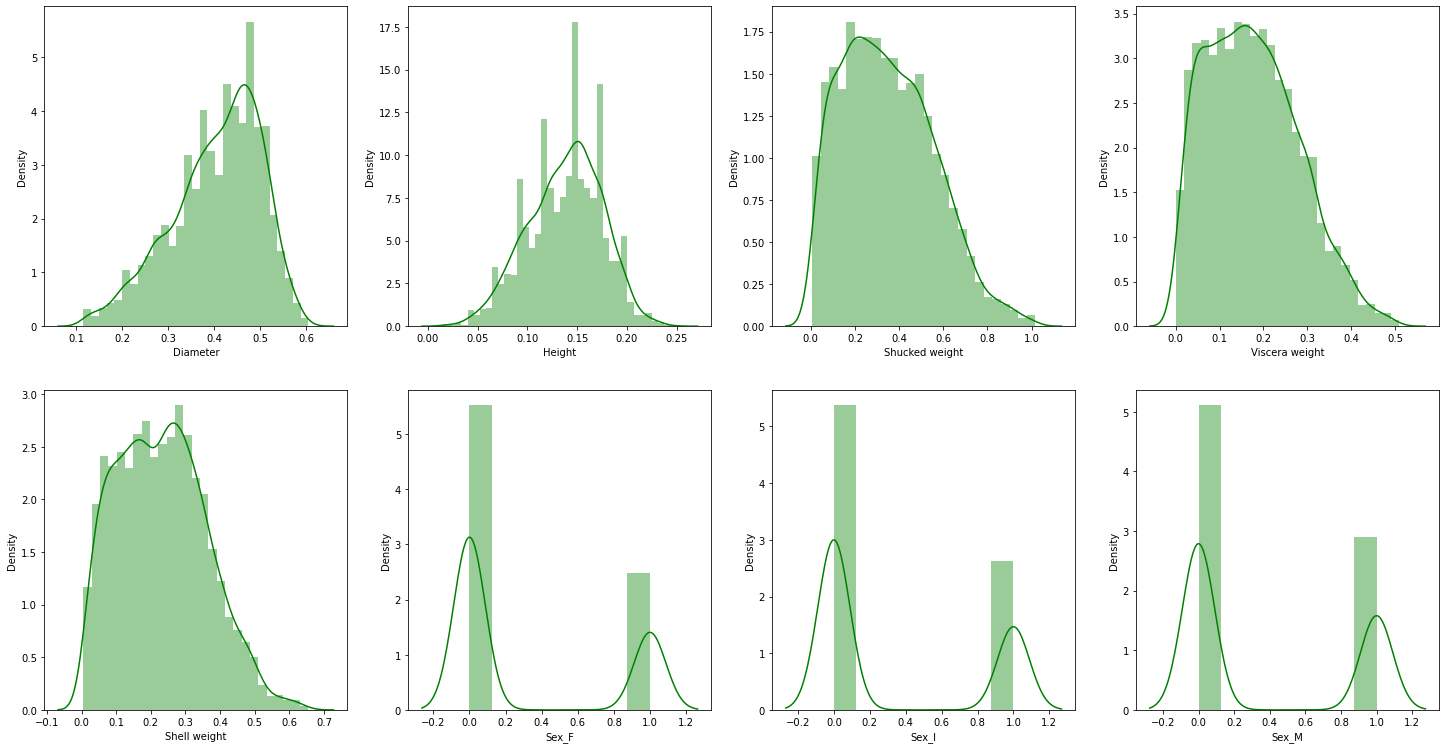

In [50]:
plt.figure(figsize=(25,20))
for i in enumerate(x.columns):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [51]:
x.skew()

Diameter         -0.605405
Height           -0.255335
Shucked weight    0.464972
Viscera weight    0.446290
Shell weight      0.355205
Sex_F             0.822616
Sex_I             0.730778
Sex_M             0.575983
dtype: float64

#### skewness more than+/- 0.5 will we treated  
#### Here we are removing skewness from Length and Diameter Columns 
#### *Sex columns was the categorical column that was encoded so we'll not treat that.

In [52]:
from sklearn.preprocessing import power_transform

x[['Diameter']]=power_transform(x[['Diameter']],method='yeo-johnson')

In [53]:
x.skew()

Diameter         -0.080529
Height           -0.255335
Shucked weight    0.464972
Viscera weight    0.446290
Shell weight      0.355205
Sex_F             0.822616
Sex_I             0.730778
Sex_M             0.575983
dtype: float64

#### We can notice skewness is almost removed from every column

### scaling X vlues


#### not scaling the data its making lot's of values ==0

In [54]:
pd.DataFrame(x).isnull().sum()

Diameter          0
Height            0
Shucked weight    0
Viscera weight    0
Shell weight      0
Sex_F             0
Sex_I             0
Sex_M             0
dtype: int64

### Splitting the data for training and testing

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



#### Let's find the best random state in below cell

In [56]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is:-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is:-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is:-0.5105322570395343
At random state 0, The test accuracy is:-0.49637829190180927


At random state 1, The training accuracy is:-0.5102313576150231
At random state 1, The test accuracy is:-0.49759052367431644


At random state 2, The training accuracy is:-0.5116459690242368
At random state 2, The test accuracy is:-0.4896528774137867


At random state 3, The training accuracy is:-0.5142815839738502
At random state 3, The test accuracy is:-0.4802266457649219


At random state 4, The training accuracy is:-0.5124251190170982
At random state 4, The test accuracy is:-0.48935203725736665


At random state 5, The training accuracy is:-0.5055415739533249
At random state 5, The test accuracy is:-0.5162554993683335


At random state 6, The training accuracy is:-0.5208977801675414
At random state 6, The test accuracy is:-0.4513760785775992


At random state 7, The training accuracy is:-0.5176911953106454
At random state 7, The test accuracy is:-0.47167788

random state=26 giving highest accuracy, choosing that as random state

In [57]:
#splitting the data into 76% training and 24% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.24,random_state=26)

In [58]:
x_train.shape

(3065, 8)

In [59]:
y_train.shape

(3065,)

In [60]:
x_test.shape

(969, 8)

In [61]:
y_test.shape

(969,)

 # MODEL BUILDING:

### Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.5194056517809411


In [63]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 4.721271974790023
MAE: 1.5901688413701744
r2_score: -0.17427124575992536


### Ridge

In [64]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.5124848747363318


In [65]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 4.854728552450323
MAE: 1.6063240589586265
r2_score: -0.32718544057885124


### SVR

#### SVR(kernel='linear')

In [66]:
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.474706229306989


In [67]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 5.357675990067469
MAE: 1.6119398326372691
r2_score: -0.705209819210725


#### SVR(kernel='poly')

In [68]:
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.4589307000309345


In [69]:
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('r2_score:',r2_score(svrpred_p,y_test))

MSE: 5.550074367914036
MAE: 1.6243453422982426
r2_score: -0.8996235363470948


#### (kernel='rbf')

In [70]:
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.47665965305379565


In [71]:
print('MSE:',mean_squared_error(svrpred_r,y_test))
print('MAE:',mean_absolute_error(svrpred_r,y_test))
print('r2_score:',r2_score(svrpred_r,y_test))


MSE: 5.275911697496315
MAE: 1.5827799210976585
r2_score: -0.8457762127675978


### RandomForestRegressor

In [72]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9320086029364566


In [73]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 4.396704953560372
MAE: 1.5282868937048504
r2_score: 0.17435004592771963


### DecisionTreeRegressor

In [74]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [75]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 8.052631578947368
MAE: 2.042311661506708
r2_score: 0.06575723129007938


### GradientBoostingRegressor

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.6330182245833883


In [77]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 4.433743005982684
MAE: 1.507290857025956
r2_score: -0.009592358793400146


### cross validation


In [78]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 4.228044, 1.972383
R    : 4.296602, 2.093455
svr    : 4.690139, 3.089908
svr_p    : 4.816229, 3.215496
svr_r    : 4.607523, 3.140397
RF    : 4.150884, 1.948989
DTR    : 7.912425, 2.872229
GBR    : 3.973185, 2.019086


#### -Accourding to all metrics score selecting the RandomForestRegressor as final model

## HYPER PARAMETER TUNING:


### GridSearchCV

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
RF=RandomForestRegressor()
param={
     'criterion':['mse','mae'],
    'n_estimators':[100, 300],
    'max_depth':[1],
   'max_features' : ["auto",],
}

In [83]:
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [84]:
RF_grid.fit(x_train,y_train)
RF_grid_pred=RF_grid.best_estimator_.predict(x_test)


Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [85]:
RF_grid.best_params_

{'criterion': 'mse',
 'max_depth': 1,
 'max_features': 'auto',
 'n_estimators': 100}

In [92]:
print('MSE:',mean_squared_error(RF_grid_pred,y_test))
print('MAE:',mean_absolute_error(RF_grid_pred,y_test))
print('r2_score:',r2_score(RF_grid_pred,y_test))

MSE: 6.301157704857612
MAE: 1.8682314274191714
r2_score: -1.7935379364777817


In [93]:
RF_grid_pred

array([ 7.50669545, 10.83998332,  7.50669545,  7.50669545,  7.50669545,
       10.83998332, 10.35705053, 10.80755928, 10.83998332, 10.80755928,
       10.83998332,  7.50669545, 10.83998332,  9.04043955,  7.50669545,
        9.40831562,  7.50669545,  7.50669545, 10.83998332,  7.50669545,
       10.80755928, 10.83998332, 10.83998332,  7.50669545, 10.83998332,
       10.83998332,  7.50669545, 10.83998332,  7.79057488, 10.83998332,
       10.71255094,  7.89608959,  8.70827731, 10.83998332, 10.83998332,
        7.50669545,  7.50669545, 10.83998332, 10.83998332,  9.47429663,
        7.50669545,  7.50669545, 10.83998332,  7.50669545, 10.83998332,
        7.50669545, 10.83998332,  7.50669545, 10.18996075, 10.83998332,
        7.50669545, 10.83998332,  7.50669545, 10.83998332,  7.58187267,
        7.58187267,  7.50669545, 10.83998332, 10.83998332, 10.83998332,
       10.83998332, 10.83998332, 10.83998332, 10.83998332,  9.04043955,
        7.58187267,  7.58187267, 10.83998332,  7.50669545, 10.83

<AxesSubplot:xlabel='Rings', ylabel='Density'>

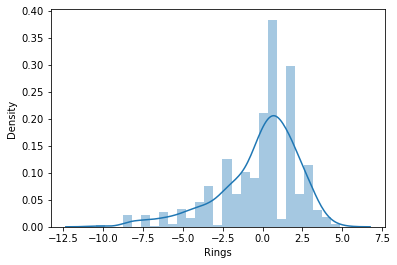

In [94]:
sns.distplot(RF_grid_pred-y_test)

## saving the model

In [95]:
import joblib

In [96]:
joblib.dump(RF_grid.best_estimator_,'Abalone Case Study_Project_Prediction.obj')

['Abalone Case Study_Project_Prediction.obj']